In [1]:
from os import listdir
from os.path import isfile, join
from utils.plot import show_training_progress

import ast
import os
import pandas as pd

In [2]:
# DATASET_NAME = 'beer'
DATASET_NAME = 'CD'

# Final Recommendation Performance

In [3]:
if DATASET_NAME == 'beer':
    folder_path = 'tables/beer_final'
else:
    folder_path = 'tables/CD_final'

In [4]:
csv_files = [join(folder_path, f) for f in listdir(folder_path) 
             if isfile(join(folder_path, f)) and f.endswith('.csv')]
csv_files

['tables/CD_final/CD_final_result1.csv',
 'tables/CD_final/CD_final_result5.csv',
 'tables/CD_final/CD_final_result4.csv',
 'tables/CD_final/CD_final_result3.csv',
 'tables/CD_final/CD_final_result2.csv']

In [5]:
df_list = []

for filename in csv_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df_list.append(df)

df = pd.concat(df_list, axis=0, ignore_index=True)

In [6]:
df.groupby('model', 
           as_index=False)['R-Precision', 'NDCG', 'MAP@5',  'MAP@10', 'MAP@20', 
                           'Precision@5', 'Precision@10', 'Precision@20', 
                           'Recall@5', 'Recall@10', 'Recall@20', 
                           ].agg({'R-Precision': 'mean', 'NDCG': 'mean', 
                                  'MAP@5': 'mean', 'MAP@10': 'mean', 
                                  'MAP@20': 'mean', 'Precision@5': 'mean',
                                  'Precision@10': 'mean', 'Precision@20': 'mean', 
                                  'Recall@5': 'mean', 'Recall@10': 'mean',
                                  'Recall@20': 'mean'}).to_csv(folder_path+'/final_results.csv', index=False)

# General Recommendation Convergence

In [7]:
if DATASET_NAME == 'beer':
    folder_path = 'tables/beer_convergence'
else:
    folder_path = 'tables/CD_convergence'

metric='NDCG'

csv_files = [join(folder_path, f) for f in listdir(folder_path) 
             if isfile(join(folder_path, f)) and f.endswith('.csv')]
csv_files

['tables/CD_convergence/CD_convergence_analysis1.csv',
 'tables/CD_convergence/CD_convergence_analysis4.csv',
 'tables/CD_convergence/CD_convergence_analysis3.csv',
 'tables/CD_convergence/CD_convergence_analysis2.csv',
 'tables/CD_convergence/CD_convergence_analysis5.csv']

In [8]:
df_list = []

for filename in csv_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df_list.append(df)

df = pd.concat(df_list, axis=0, ignore_index=True)

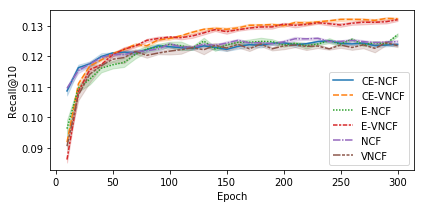

In [9]:
show_training_progress(df, hue='model', metric="Recall@10", name="epoch_vs_ndcg", save=False)

# Final Explanation Performance

In [10]:
if DATASET_NAME == 'beer':
    folder_path = 'tables/beer_final_explanation'
else:
    folder_path = 'tables/CD_final_explanation'

csv_files = [join(folder_path, f) for f in listdir(folder_path) 
             if isfile(join(folder_path, f)) and f.endswith('.csv')]

csv_files

['tables/CD_final_explanation/CD_final_explanation2.csv',
 'tables/CD_final_explanation/CD_final_explanation5.csv',
 'tables/CD_final_explanation/CD_final_explanation3.csv',
 'tables/CD_final_explanation/CD_final_explanation4.csv',
 'tables/CD_final_explanation/CD_final_explanation1.csv']

In [11]:
df_list = []

for filename in csv_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df_list.append(df)

df = pd.concat(df_list, axis=0, ignore_index=True)

In [12]:
df['MAP@5'] = df['MAP@5'].apply(lambda accuracy: ast.literal_eval(accuracy)[0])
df['MAP@10'] = df['MAP@10'].apply(lambda accuracy: ast.literal_eval(accuracy)[0])
df['MAP@15'] = df['MAP@15'].apply(lambda accuracy: ast.literal_eval(accuracy)[0])
df['MAP@20'] = df['MAP@20'].apply(lambda accuracy: ast.literal_eval(accuracy)[0])

df['NDCG@5'] = df['NDCG@5'].apply(lambda accuracy: ast.literal_eval(accuracy)[0])
df['NDCG@10'] = df['NDCG@10'].apply(lambda accuracy: ast.literal_eval(accuracy)[0])
df['NDCG@15'] = df['NDCG@15'].apply(lambda accuracy: ast.literal_eval(accuracy)[0])
df['NDCG@20'] = df['NDCG@20'].apply(lambda accuracy: ast.literal_eval(accuracy)[0])

df['Precision@5'] = df['Precision@5'].apply(lambda accuracy: ast.literal_eval(accuracy)[0])
df['Precision@10'] = df['Precision@10'].apply(lambda accuracy: ast.literal_eval(accuracy)[0])
df['Precision@15'] = df['Precision@15'].apply(lambda accuracy: ast.literal_eval(accuracy)[0])
df['Precision@20'] = df['Precision@20'].apply(lambda accuracy: ast.literal_eval(accuracy)[0])

df['Recall@10'] = df['Recall@10'].apply(lambda accuracy: ast.literal_eval(accuracy)[0])
df['Recall@15'] = df['Recall@15'].apply(lambda accuracy: ast.literal_eval(accuracy)[0])
df['Recall@20'] = df['Recall@20'].apply(lambda accuracy: ast.literal_eval(accuracy)[0])
df['Recall@5'] = df['Recall@5'].apply(lambda accuracy: ast.literal_eval(accuracy)[0])

In [13]:
df = df.groupby('model', 
                as_index=False)['MAP@5', 'MAP@10', 'MAP@15', 'MAP@20', 
                                'NDCG@5', 'NDCG@10', 'NDCG@15', 'NDCG@20', 
                                'Precision@5', 'Precision@10', 'Precision@15', 'Precision@20', 
                                'Recall@5', 'Recall@10', 'Recall@15', 'Recall@20'
                                ].agg({'MAP@5': 'mean', 'MAP@10': 'mean',
                                       'MAP@15': 'mean', 'MAP@20': 'mean',
                                       'NDCG@5': 'mean', 'NDCG@10': 'mean',
                                       'NDCG@15': 'mean', 'NDCG@20': 'mean',
                                       'Precision@5': 'mean', 'Precision@10': 'mean',
                                       'Precision@15': 'mean', 'Precision@20': 'mean', 
                                       'Recall@5': 'mean', 'Recall@10': 'mean',
                                       'Recall@15': 'mean', 'Recall@20': 'mean'})
df

,model,MAP@5,MAP@10,MAP@15,MAP@20,NDCG@5,NDCG@10,NDCG@15,NDCG@20,Precision@5,Precision@10,Precision@15,Precision@20,Recall@5,Recall@10,Recall@15,Recall@20
0,CE-NCF,0.35974,0.29006,0.24954,0.22128,0.47044,0.55204,0.59392,0.61666,0.27252,0.19424,0.15362,0.12636,0.51986,0.70254,0.81672,0.88586
1,CE-VNCF,0.37740,0.30098,0.25632,0.22554,0.49466,0.56966,0.60504,0.62460,0.28326,0.19538,0.15098,0.12298,0.53928,0.70574,0.80128,0.86032
2,E-NCF,0.36676,0.29344,0.25052,0.22084,0.48102,0.55532,0.59166,0.61204,0.27742,0.19190,0.14906,0.12176,0.52716,0.69250,0.79090,0.85314
3,E-VNCF,0.34634,0.28006,0.24088,0.21352,0.45448,0.53212,0.57126,0.59388,0.26506,0.18806,0.14794,0.12194,0.50508,0.67808,0.78502,0.85398
4,ItemPop,0.10800,0.09460,0.08520,0.07970,0.13850,0.16530,0.19430,0.23130,0.10470,0.07160,0.06410,0.06500,0.16540,0.22590,0.30710,0.42590
5,UserPop,0.10120,0.08860,0.08080,0.07620,0.12360,0.15400,0.18440,0.22250,0.09320,0.06900,0.06310,0.06500,0.14380,0.21180,0.29690,0.41840


In [14]:
df[['model', 'NDCG@5', 'NDCG@10', 'NDCG@20', 
    'MAP@5', 'MAP@10', 'MAP@20', 
    'Precision@5', 'Precision@10', 'Precision@20', 
    'Recall@5', 'Recall@10', 'Recall@20']].to_csv(folder_path+'/final_explanation_results.csv', index=False)

# Explanation Convergence

In [15]:
if DATASET_NAME == 'beer':
    folder_path = 'tables/beer_explanation_convergence'
else:
    folder_path = 'tables/CD_explanation_convergence'

csv_files = [join(folder_path, f) for f in listdir(folder_path) 
             if isfile(join(folder_path, f)) and f.endswith('.csv')]
csv_files

['tables/CD_explanation_convergence/CD_convergence_analysis1.csv',
 'tables/CD_explanation_convergence/CD_convergence_analysis4.csv',
 'tables/CD_explanation_convergence/CD_convergence_analysis3.csv',
 'tables/CD_explanation_convergence/CD_convergence_analysis2.csv',
 'tables/CD_explanation_convergence/CD_convergence_analysis5.csv']

In [16]:
df_list = []

for filename in csv_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df_list.append(df)

df = pd.concat(df_list, axis=0, ignore_index=True)

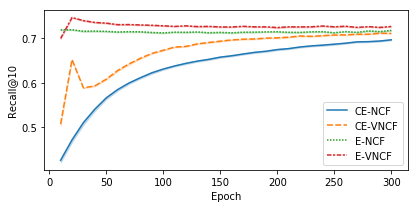

In [17]:
# show_training_progress(df, hue='model', metric="MAP@10", name="epoch_vs_ndcg")
# show_training_progress(df, hue='model', metric="NDCG@10", name="epoch_vs_ndcg")
# show_training_progress(df, hue='model', metric="Precision@10", name="epoch_vs_ndcg")
show_training_progress(df, hue='model', metric="Recall@10", name="epoch_vs_ndcg")